In [20]:
import hmac
import secrets
import time
import json
import hashlib
import requests
from requests.auth import AuthBase
import base64
import matplotlib.pyplot as plt
import pymongo

In [2]:
API_KEY = secrets.API_KEY
API_SECRET = secrets.API_SECRET
API_PASSPHRASE = secrets.API_PASSPHRASE

timestamp = str(int(time.time()))
method = 'GET'
path = '/coinbase-accounts'

message = timestamp + method + path + ""
message = message.encode('utf-8')
hmac_key = base64.b64decode(API_SECRET)
signature = hmac.new(hmac_key, message, hashlib.sha256)
signature_b64 = base64.b64encode(signature.digest()).decode('utf-8')


headers = {
    'CB-ACCESS-SIGN': signature_b64,
    'CB-ACCESS-TIMESTAMP': timestamp,
    'CB-ACCESS-KEY': API_KEY,
    'CB-ACCESS-PASSPHRASE': API_PASSPHRASE,
    'Content-Type': 'application/json'
}

url = 'https://api.exchange.coinbase.com/coinbase-accounts'
payload = {}

r = requests.get(url, headers=headers)

data = json.loads(r.content)

for i in data:
    if i["currency"] == "DOGE":
        print(i["id"])
        break


bb6fa20b-dcf9-50cc-b847-0a55d35e17b6


In [3]:
class CoinbaseAccount:
    def __init__(self, API_KEY, API_SECRET, API_PASSPHRASE):
        self.API_KEY = API_KEY
        self.API_SECRET = API_SECRET
        self.API_PASSPHRASE = API_PASSPHRASE
        self.BASE_PATH = "https://api.exchange.coinbase.com"

    def create_request(self, method, path, body=""):

        timestamp = str(int(time.time()))

        if method == "GET":
            body = ""
        else:
            body = json.dumps(body)

        message = timestamp + method + path + body
        
        message = message.encode('utf-8')
        hmac_key = base64.b64decode(self.API_SECRET)
        signature = hmac.new(hmac_key, message, hashlib.sha256)
        signature_b64 = base64.b64encode(signature.digest()).decode('utf-8')

        headers = {
            'CB-ACCESS-SIGN': signature_b64,
            'CB-ACCESS-TIMESTAMP': timestamp,
            'CB-ACCESS-KEY': self.API_KEY,
            'CB-ACCESS-PASSPHRASE': self.API_PASSPHRASE,
            'Content-Type': 'application/json'
        }

        fullpath = self.BASE_PATH + path

        if method == "GET":
            r = requests.get(fullpath, headers=headers)
        else:
            r = requests.get(fullpath, headers=headers, data=body)
        return r

In [4]:
cb_acc = CoinbaseAccount(API_KEY=secrets.API_KEY,
                         API_SECRET=secrets.API_SECRET,
                         API_PASSPHRASE=secrets.API_PASSPHRASE)

In [5]:
res = cb_acc.create_request(
    'GET', '/accounts')
res = json.loads(res.content)
res

[{'id': 'eba53a43-ae6a-428b-83a4-0450a2913f69',
  'currency': '1INCH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'eec68701-c29f-4e6c-b824-a267027251f7',
  'trading_enabled': True},
 {'id': 'faef07b1-6172-4fdd-9785-f006d86502d7',
  'currency': 'AAVE',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'eec68701-c29f-4e6c-b824-a267027251f7',
  'trading_enabled': True},
 {'id': '0fb26fe0-727d-41cd-b826-5b268ecde78e',
  'currency': 'ACH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'eec68701-c29f-4e6c-b824-a267027251f7',
  'trading_enabled': True},
 {'id': '736bb027-fc6b-49d9-8b98-5e473263481f',
  'currency': 'ADA',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'eec68701-c29f-4e6c-b824-a267027251f7',
  'trading_enabled': True},
 {'id': '474d04a8-14a6-4b75-ae74-506c

In [6]:
res[36]

{'id': 'f6e2f0d5-3f3c-43b7-8b78-9a8b0705c657',
 'currency': 'DOGE',
 'balance': '88.8000000000000000',
 'hold': '0.0000000000000000',
 'available': '88.8',
 'profile_id': 'eec68701-c29f-4e6c-b824-a267027251f7',
 'trading_enabled': True}

In [11]:
res = cb_acc.create_request(
    'GET', '/accounts')
res = json.loads(res.content)
pie = []

for acc in res:
    bal = float(acc["balance"])
    if bal > 0:
        pie.append({
            "amount": bal,
            "label": acc["currency"]
        })

for curr in pie:
    if curr['label'] != 'USD':
        res = cb_acc.create_request('GET', f"/products/{curr['label']}-USD/ticker")
        curr['price'] = float(json.loads(res.content)['price'])

        print(f"Price of {curr['label']}: {curr['price']}")
    else:
        curr['price'] = 1

    usd = curr['price'] * curr['amount']
    
    curr['usd'] = usd

total = sum([c["usd"] for c in pie])

for curr in pie:
    curr["percentage"] = curr["usd"] / total


Price of DOGE: 0.264


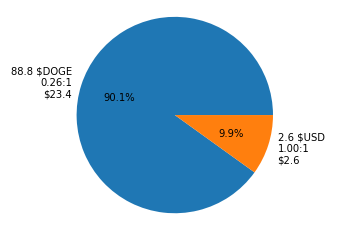

In [14]:
labels = [f"{c['amount']:.1f} ${c['label']}\n{c['price']:3.2f}:1\n${c['usd']:.1f}" for c in pie]

fig1, ax1 = plt.subplots()
ax1.pie([c['usd'] for c in pie], 
        labels=labels,
        autopct='%1.1f%%')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_facecolor('white')

plt.show()


In [21]:
client = pymongo.MongoClient(
    "mongodb+srv://<username>:<password>@cluster0.vk91n.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")
db = client.test


ConfigurationError: The "dnspython" module must be installed to use mongodb+srv:// URIs. To fix this error install pymongo with the srv extra:
 C:\Users\Eddie\AppData\Local\Programs\Python\Python39\python.exe -m pip install "pymongo[srv]"